# Phân tích mức tiêu hao nhiên liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


In [2]:
POP_mpg = pd.read_csv('mpg.csv')
POP_mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [3]:
POP_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### 2.2 Xóa các dòng không có dữ liệu


In [4]:
POP_mpg.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [5]:
print('Trung binh cua cylinders la: ', POP_mpg['cylinders'].mean())
print('Trung binh cua horsepower la: ', POP_mpg['horsepower'].mean())
print('Trung binh cua weight la: ', POP_mpg['weight'].mean())

print('Trung vi cua cylinders la: ', POP_mpg['cylinders'].median())
print('Trung vi cua horsepower la: ', POP_mpg['horsepower'].median())
print('Trung vi cua weight la: ', POP_mpg['weight'].median())

Trung binh cua cylinders la:  5.454773869346734
Trung binh cua horsepower la:  104.46938775510205
Trung binh cua weight la:  2970.424623115578
Trung vi cua cylinders la:  4.0
Trung vi cua horsepower la:  93.5
Trung vi cua weight la:  2803.5


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [6]:
print('Mien gia tri cua mpg la: ', POP_mpg['mpg'].max() - POP_mpg['mpg'].min())
print('Mien phan vi cua mpg la: ', POP_mpg['mpg'].quantile(0.75) - POP_mpg['mpg'].quantile(0.25))

Mien gia tri cua mpg la:  37.6
Mien phan vi cua mpg la:  11.5


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [7]:
POP_mpg.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

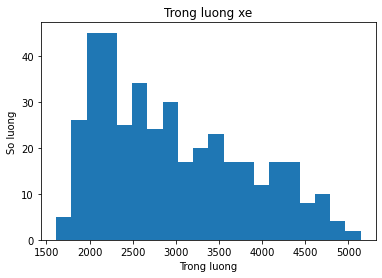

In [8]:
plt.hist(POP_mpg['weight'], bins=20)
plt.title('Trong luong xe')
plt.xlabel('Trong luong')
plt.ylabel('So luong')
plt.show()

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [9]:
POP_mpg.groupby('origin')['name'].value_counts(normalize=True)

origin  name                 
europe  peugeot 504              0.057143
        volkswagen dasher        0.042857
        audi 100ls               0.028571
        fiat 128                 0.028571
        opel 1900                0.028571
                                   ...   
usa     pontiac lemans v6        0.004016
        pontiac phoenix lj       0.004016
        pontiac safari (sw)      0.004016
        pontiac sunbird coupe    0.004016
        pontiac ventura sj       0.004016
Name: name, Length: 305, dtype: float64

## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

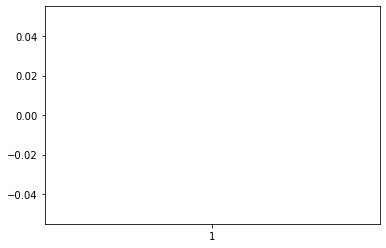

In [10]:
sample_70 = POP_mpg[(POP_mpg['model_year'] >= 70) & (POP_mpg['model_year']<80)]['horsepower']
sample_80 = POP_mpg[(POP_mpg['model_year'] >= 80) & (POP_mpg['model_year']<90)]['horsepower']
plt.boxplot(sample_70)
plt.show()

In [11]:
sample_80

309    76.0
310    60.0
311    70.0
312    65.0
313    90.0
       ... 
393    86.0
394    52.0
395    84.0
396    79.0
397    82.0
Name: horsepower, Length: 89, dtype: float64

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

### 7.2 Với công suất theo mã lực

### 7.3 Với gia tốc

### 7.4 Với năm sản xuất